In [1]:
import pandas as pd
import numpy as np

# Charger les données
genome_tags_df = pd.read_csv('/Film_recom/Datasets/genome-tags.csv')

# Afficher les premières lignes du DataFrame
print("Premières lignes du DataFrame:")
print(genome_tags_df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
print(genome_tags_df.info())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes dans le DataFrame:")
print(genome_tags_df.isnull().sum())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives:")
print(genome_tags_df.describe())

# Afficher les 10 premiers tags
print("\nLes 10 premiers tags:")
print(genome_tags_df.head(10))

# Afficher les 10 derniers tags
print("\nLes 10 derniers tags:")
print(genome_tags_df.tail(10))

# Nombre total de tags
print(f"\nNombre total de tags: {len(genome_tags_df)}")

# Vérifier si les tagId sont uniques et consécutifs
is_unique = genome_tags_df['tagId'].is_unique
is_consecutive = np.all(np.diff(genome_tags_df['tagId']) == 1)
print(f"\nLes tagId sont-ils uniques ? {is_unique}")
print(f"Les tagId sont-ils consécutifs ? {is_consecutive}")

# Longueur des tags
genome_tags_df['tag_length'] = genome_tags_df['tag'].str.len()
print("\nStatistiques sur la longueur des tags:")
print(genome_tags_df['tag_length'].describe())

# Tags les plus longs et les plus courts
print("\nTags les plus longs:")
print(genome_tags_df.nlargest(5, 'tag_length')[['tagId', 'tag', 'tag_length']])
print("\nTags les plus courts:")
print(genome_tags_df.nsmallest(5, 'tag_length')[['tagId', 'tag', 'tag_length']])

# Vérifier s'il y a des tags en double
duplicate_tags = genome_tags_df[genome_tags_df.duplicated(subset='tag', keep=False)]
print(f"\nNombre de tags en double: {len(duplicate_tags)}")
if len(duplicate_tags) > 0:
    print("Tags en double:")
    print(duplicate_tags)

Premières lignes du DataFrame:
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None

Valeurs manquantes dans le DataFrame:
tagId    0
tag      0
dtype: int64

Statistiques descriptives:
             tagId
count  1128.000000
mean    564.500000
std     325.769857
min       1.000000
25%     282.750000
50%     564.500000
75%     846.250000
max    1128.000000

Les 10 premiers tags:
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
5      6         1950s
6      7         1960s
7      8     

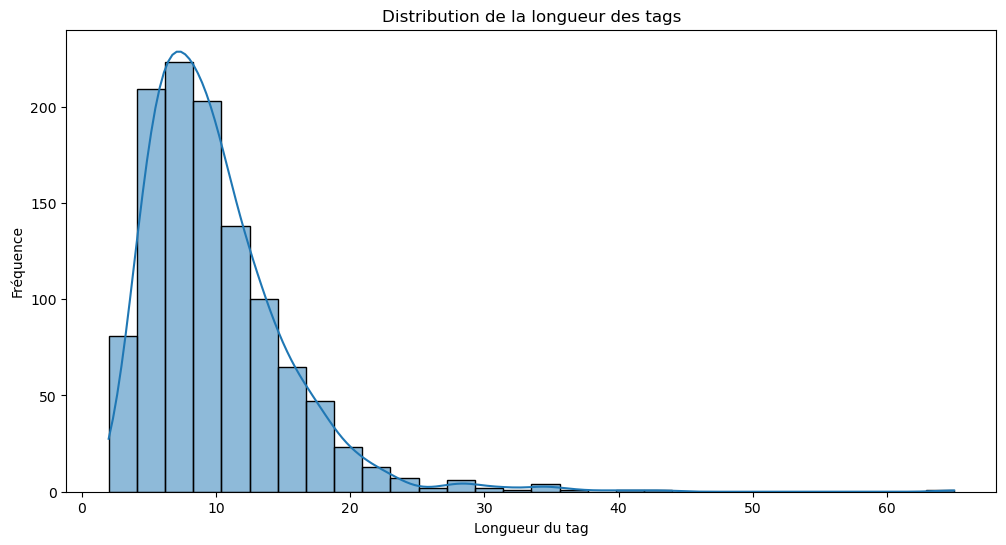

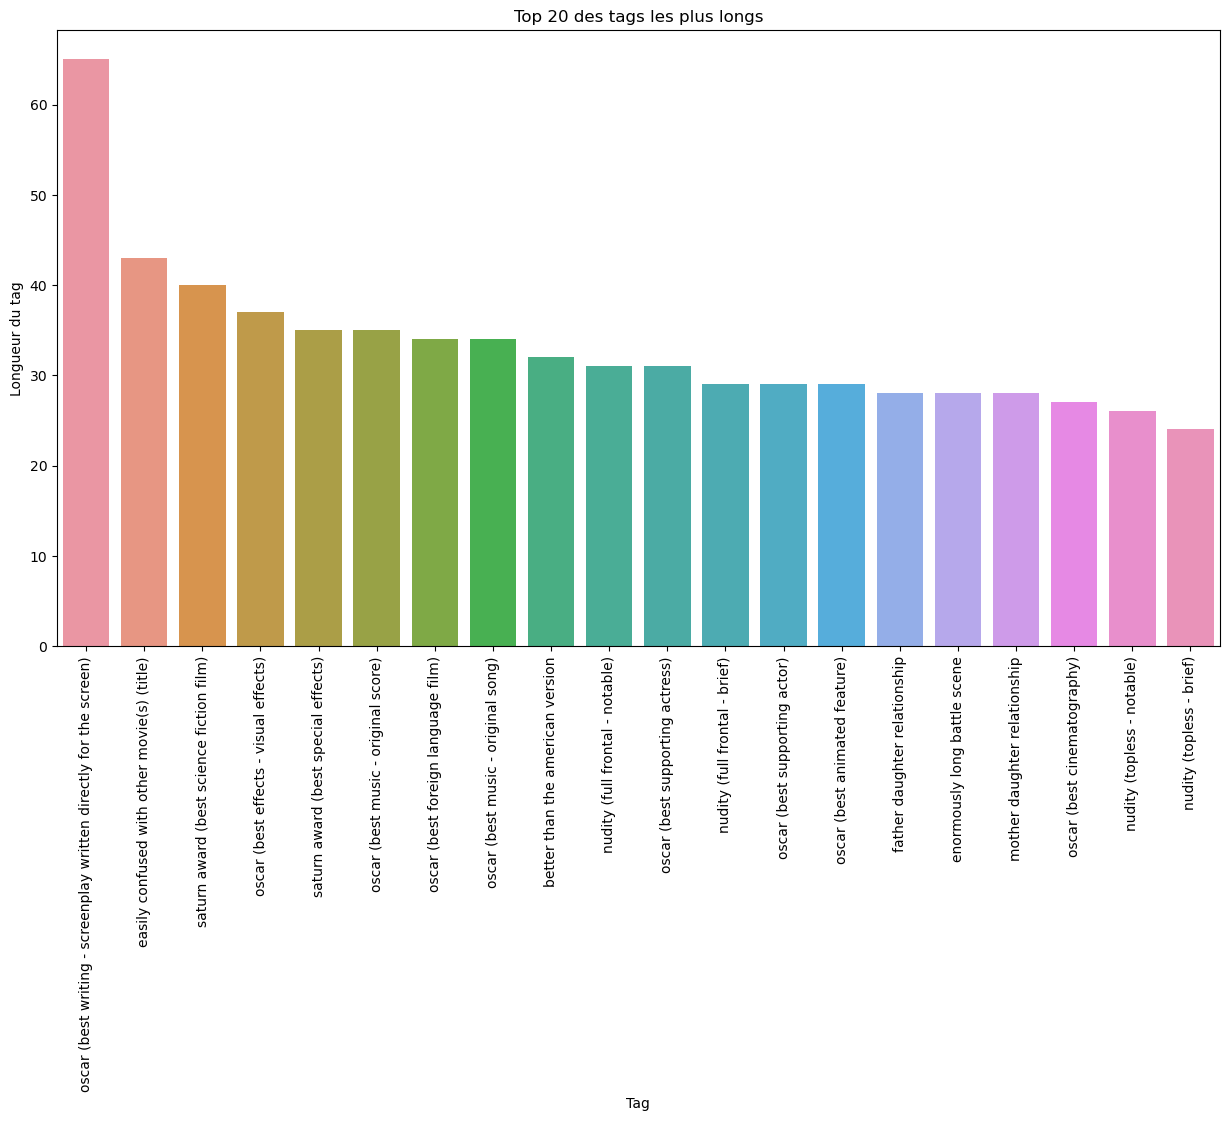

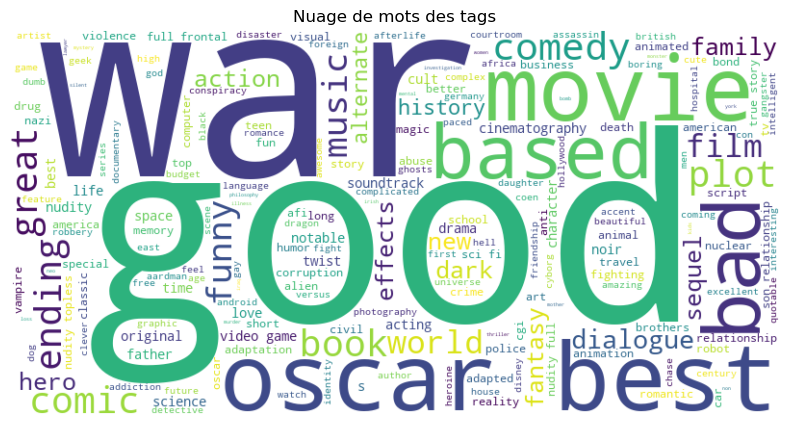

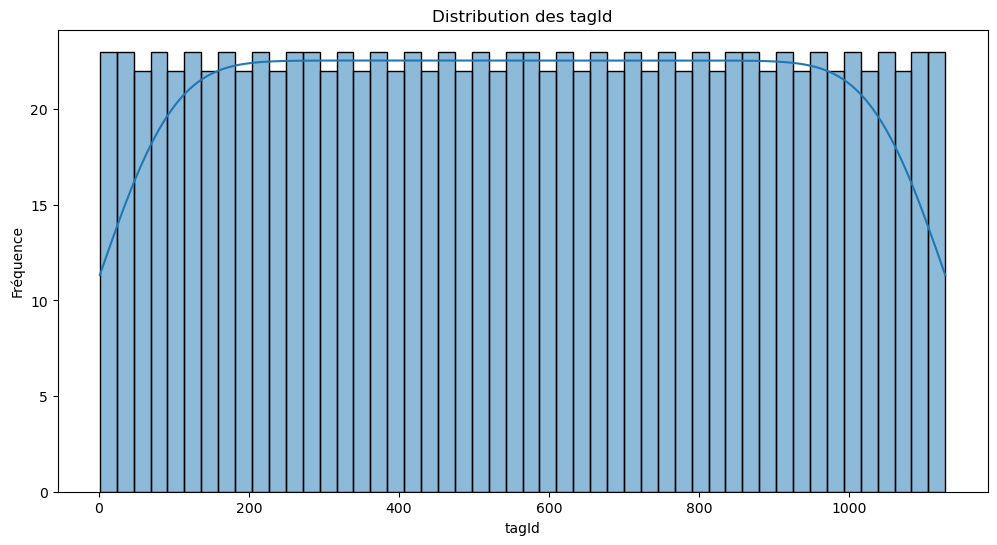

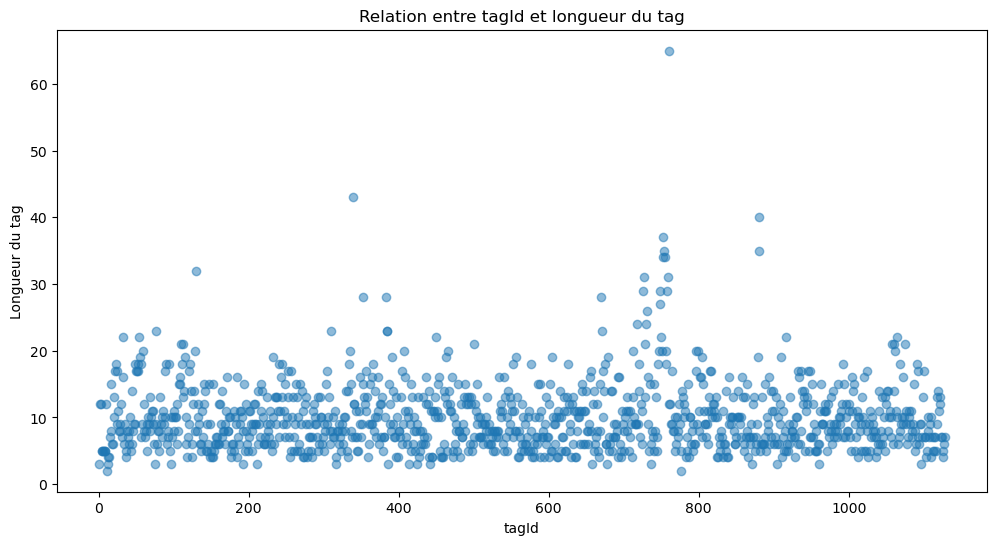

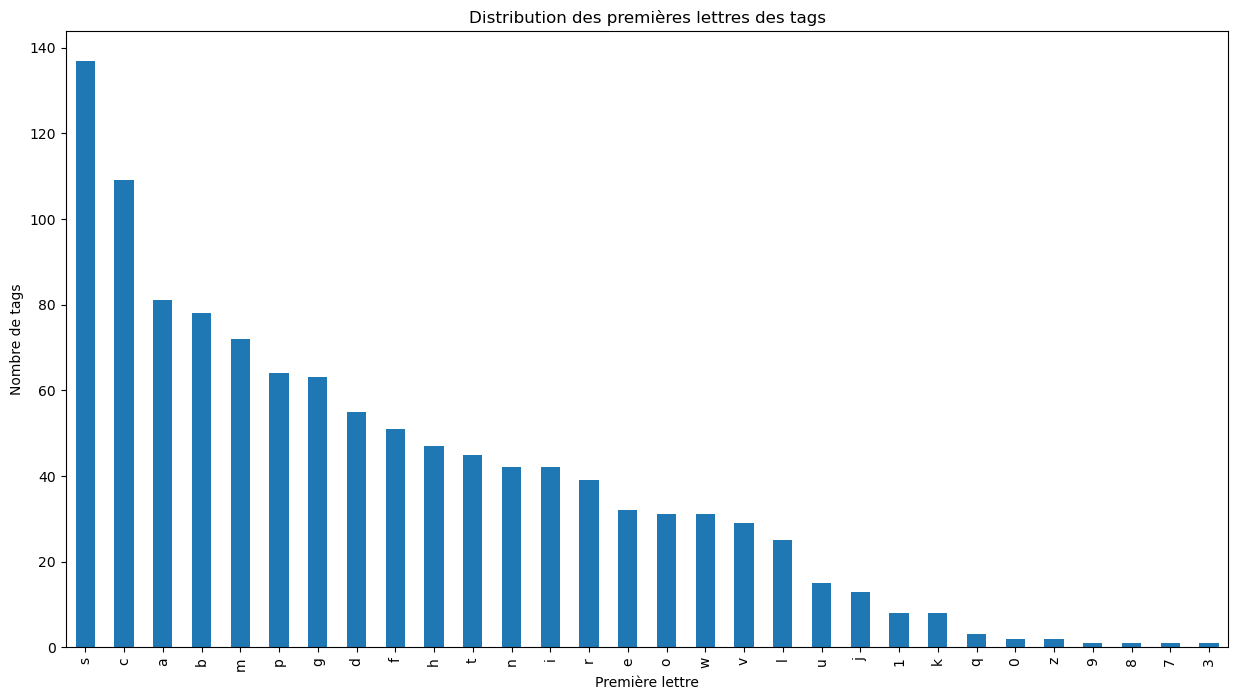

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Charger les données (si ce n'est pas déjà fait)
genome_tags_df = pd.read_csv('/Film_recom/genome-tags.csv')

# 1. Distribution de la longueur des tags
genome_tags_df['tag_length'] = genome_tags_df['tag'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(genome_tags_df['tag_length'], bins=30, kde=True)
plt.title('Distribution de la longueur des tags')
plt.xlabel('Longueur du tag')
plt.ylabel('Fréquence')
plt.show()

# 2. Top 20 des tags les plus longs
top_20_longest = genome_tags_df.sort_values('tag_length', ascending=False).head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x='tag', y='tag_length', data=top_20_longest)
plt.title('Top 20 des tags les plus longs')
plt.xlabel('Tag')
plt.ylabel('Longueur du tag')
plt.xticks(rotation=90)
plt.show()

# 3. Nuage de mots des tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(genome_tags_df['tag']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

# 4. Distribution des tagId
plt.figure(figsize=(12, 6))
sns.histplot(genome_tags_df['tagId'], bins=50, kde=True)
plt.title('Distribution des tagId')
plt.xlabel('tagId')
plt.ylabel('Fréquence')
plt.show()

# 5. Relation entre tagId et longueur du tag
plt.figure(figsize=(12, 6))
plt.scatter(genome_tags_df['tagId'], genome_tags_df['tag_length'], alpha=0.5)
plt.title('Relation entre tagId et longueur du tag')
plt.xlabel('tagId')
plt.ylabel('Longueur du tag')
plt.show()

# 6. Distribution des premières lettres des tags
first_letters = genome_tags_df['tag'].str[0].value_counts()
plt.figure(figsize=(15, 8))
first_letters.plot(kind='bar')
plt.title('Distribution des premières lettres des tags')
plt.xlabel('Première lettre')
plt.ylabel('Nombre de tags')
plt.show()

In [ ]:
from genome-tags_pipeline import GenomeTagDataPipeline

# Créer une instance du pipeline
pipeline = GenomeTagDataPipeline('/Film_recom/genome-tags.csv')

# Exécuter le pipeline
pipeline.run_pipeline()

# Si vous voulez accéder aux données traitées
processed_data = pipeline.get_data()

# Vous pouvez maintenant utiliser processed_data pour d'autres analyses si nécessaire